## CTR Définition

Le taux de clics (TDC ou CTR) est un rapport entre le nombre de clics qu'un élément reçoit et le nombre d'affichages de celui-ci. Il s'exprime en pourcentage. Par exemple, si une bannière publicitaire est affichée 1 000 fois et reçoit 10 clics, le taux de clics sera de 1 %.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

=== Statistiques par appareil ===
                              Clics  Impressions     CTR  Position
Appareil   type                                                   
Mobile     electric KWD          73       9077.0   0.80%     15.34
           electric URL         449      27057.0   1.66%     13.97
           global            408346   21087244.0   1.94%     13.94
           manufacturer URL    6456     599182.0   1.08%     11.92
           tesla KWD           1270      71407.0   1.78%     12.77
Ordinateur electric KWD          91      15689.0   0.58%     21.45
           electric URL         458      33081.0   1.38%     19.55
           global            255313   17067753.0   1.50%     27.67
           manufacturer URL    3353     349886.0   0.96%     20.43
           tesla KWD            725      59012.0   1.23%     19.42
Tablette   electric KWD           1         84.0   1.19%      4.39
           electric URL          25        227.0  11.01%      4.21
           global           

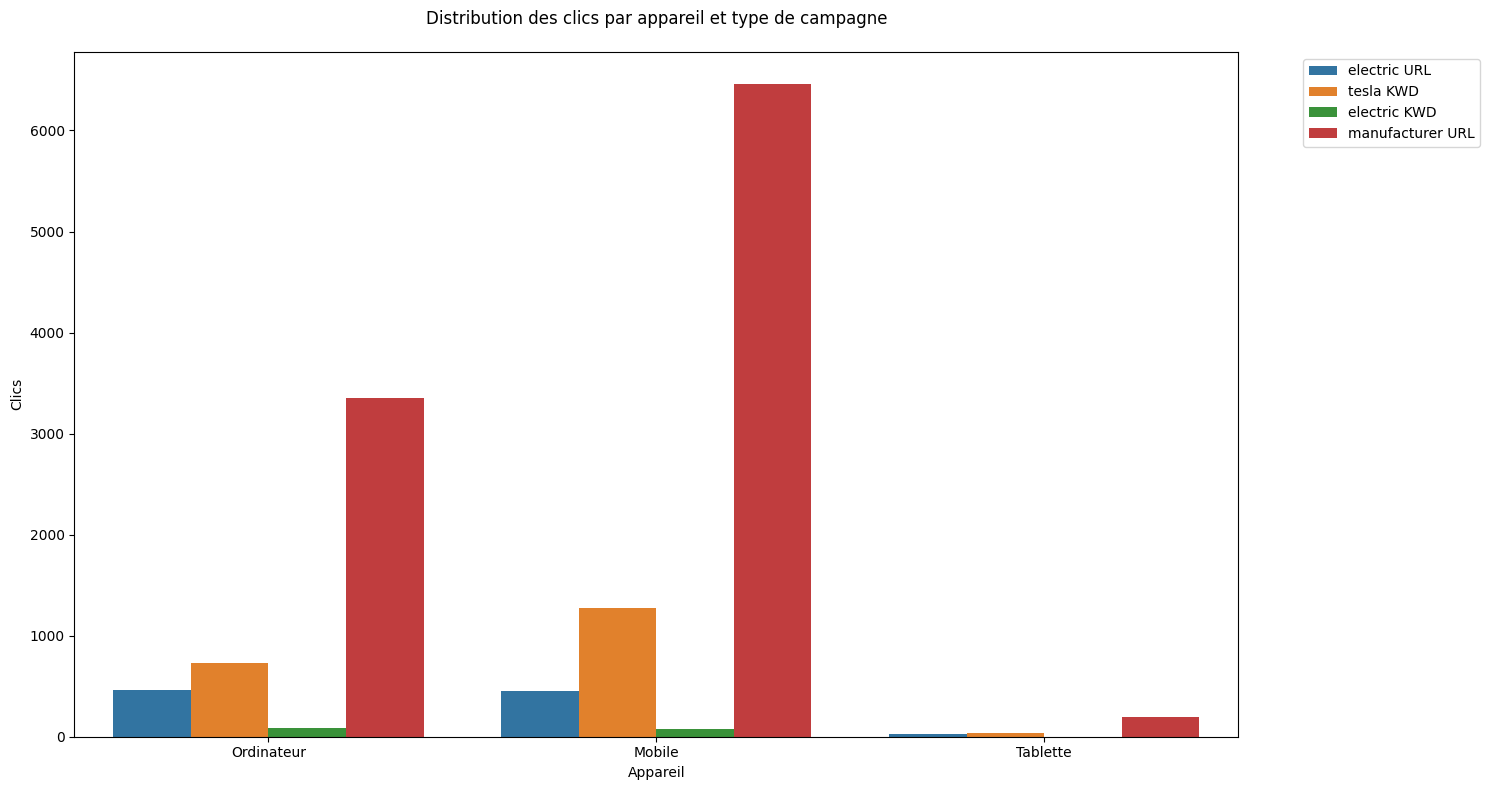

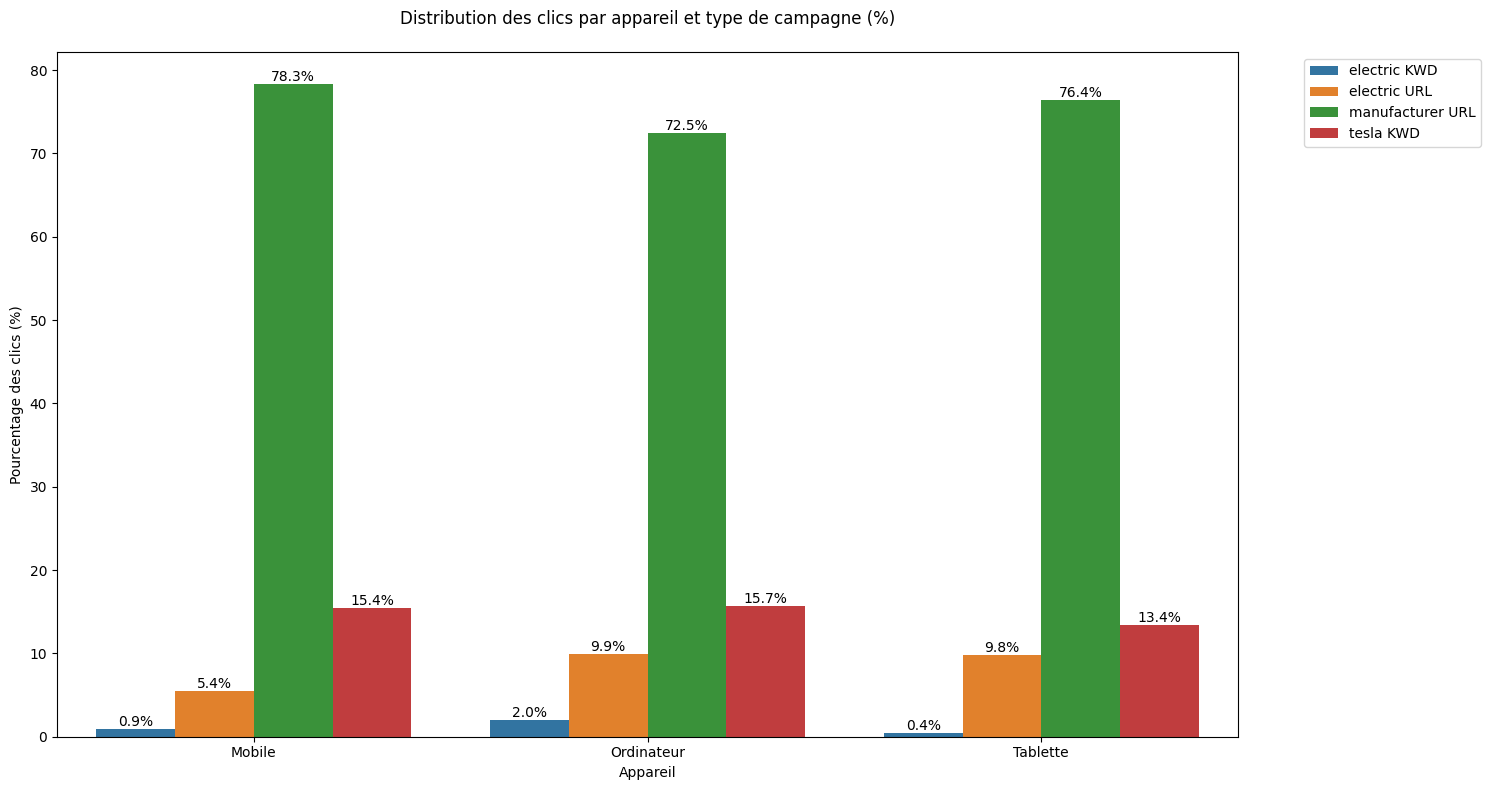


=== KPIs Globaux ===
Total Clics: 689440
Total Impressions: 39642556.0
CTR Moyen: 1.74%
Position Moyenne: 13.81


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier Excel avec spécification explicite des types de données
dtypes = {
    'Appareil': str,
    'Clics': int,
    'Impressions': float,
    'CTR': str,
    'Position': float,
    'type': str
}

# Lecture du fichier
df = pd.read_excel('clean_data/appareil_final.xlsx')

# Nettoyage des données
def clean_data(df):
    # Convertir les pourcentages en nombres décimaux
    df['CTR'] = df['CTR'].str.rstrip('%').astype('float') / 100
    
    # Convertir les impressions en nombres (enlever les virgules)
    df['Impressions'] = df['Impressions'].astype(str).str.replace(',', '').astype(float)
    
    return df

df = clean_data(df)

# 1. Analyses globales par type d'appareil
def generate_device_stats(df):
    return df.groupby(['Appareil', 'type']).agg({
        'Clics': 'sum',
        'Impressions': 'sum',
        'CTR': lambda x: f"{(x.mean() * 100):.2f}%",
        'Position': 'mean'
    }).round(2)

# 2. Comparaison des performances par type de campagne
def compare_campaign_types(df):
    return df.groupby('type').agg({
        'Clics': 'sum',
        'Impressions': 'sum',
        'CTR': lambda x: f"{(x.mean() * 100):.2f}%",
        'Position': 'mean'
    }).round(2)

# 3. Visualisation des clics par appareil (nombres absolus)
def plot_device_clicks(df):
    plt.figure(figsize=(15, 8))
    specific_campaigns = ['electric URL', 'tesla KWD', 'electric KWD', 'manufacturer URL']
    df_plot = df[df['type'].isin(specific_campaigns)]
    
    sns.barplot(data=df_plot, x='Appareil', y='Clics', hue='type')
    plt.title('Distribution des clics par appareil et type de campagne', pad=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.tight_layout()
    return plt

# 4. Visualisation des clics par appareil (pourcentages)
def plot_device_clicks_percentage(df):
    plt.figure(figsize=(15, 8))
    specific_campaigns = ['electric URL', 'tesla KWD', 'electric KWD', 'manufacturer URL']
    df_plot = df[df['type'].isin(specific_campaigns)]
    
    # Calculer le total des clics par appareil (toutes campagnes confondues)
    total_par_appareil = df_plot.groupby('Appareil')['Clics'].sum()
    
    # Calculer les pourcentages par appareil
    df_percentage = df_plot.groupby(['Appareil', 'type'])['Clics'].sum().unstack()
    df_percentage = df_percentage.div(total_par_appareil, axis=0) * 100
    df_percentage = df_percentage.reset_index().melt(id_vars='Appareil', var_name='type', value_name='Pourcentage')
    
    # Créer le graphique avec les pourcentages
    sns.barplot(data=df_percentage, x='Appareil', y='Pourcentage', hue='type')
    plt.title('Distribution des clics par appareil et type de campagne (%)', pad=20)
    plt.ylabel('Pourcentage des clics (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    
    # Ajouter les valeurs en pourcentage sur les barres
    for container in plt.gca().containers:
        plt.bar_label(container, fmt='%.1f%%')
    
    plt.tight_layout()
    return plt

# 5. Analyse des positions moyennes
def analyze_positions(df):
    return pd.pivot_table(
        df,
        values='Position',
        index='Appareil',
        columns='type',
        aggfunc='mean'
    ).round(2)

# Exécution et affichage
try:
    print("=== Statistiques par appareil ===")
    print(generate_device_stats(df))
    
    print("\n=== Comparaison des types de campagne ===")
    print(compare_campaign_types(df))
    
    print("\n=== Analyse des positions moyennes ===")
    print(analyze_positions(df))
    
    # Visualisations
    # Premier plot: nombres absolus
    plot_device_clicks(df)
    plt.show()
    
    # Deuxième plot: pourcentages
    plot_device_clicks_percentage(df)
    plt.show()
    
    # KPIs globaux
    kpis = {
        'Total Clics': df['Clics'].sum(),
        'Total Impressions': df['Impressions'].sum(),
        'CTR Moyen': f"{(df['Clics'].sum() / df['Impressions'].sum() * 100):.2f}%",
        'Position Moyenne': df['Position'].mean().round(2)
    }
    
    print("\n=== KPIs Globaux ===")
    for kpi, value in kpis.items():
        print(f"{kpi}: {value}")

except Exception as e:
    print(f"Une erreur s'est produite: {str(e)}")
    print("Détails de l'erreur:")
    import traceback
    traceback.print_exc()

=== Statistiques par apparence ===
                                                             Clics  \
Apparence dans les résultats de recherche type                       
Extrait d'avis                            electric KWD           1   
                                          global            209888   
                                          tesla KWD             44   
Extraits de produits                      electric KWD           0   
                                          electric URL           1   
                                          global             10996   
                                          manufacturer URL     447   
                                          tesla KWD              4   
Résultats traduits                        electric URL           3   
                                          global               190   
Vidéos                                    global                 0   

                                                      

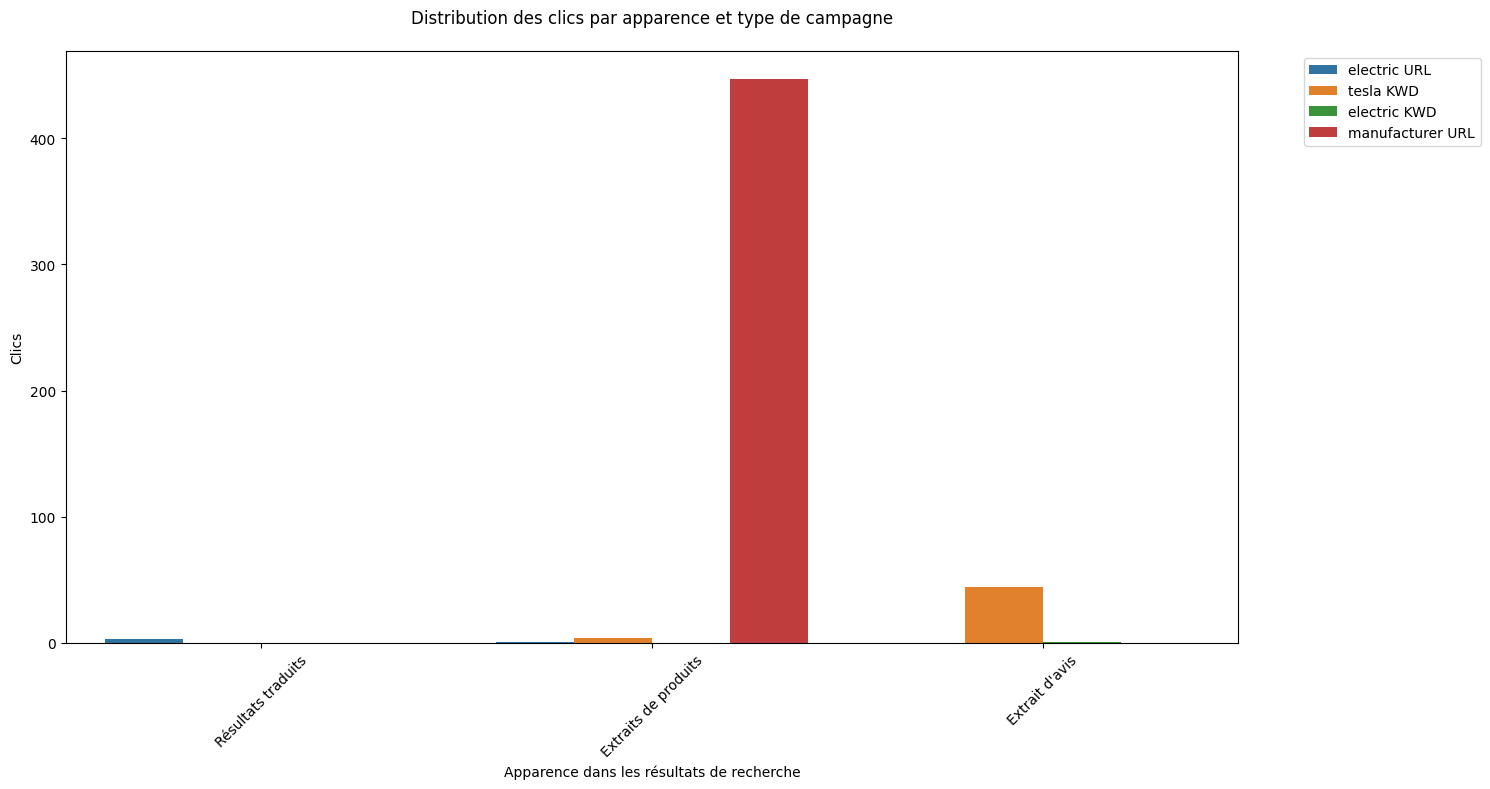

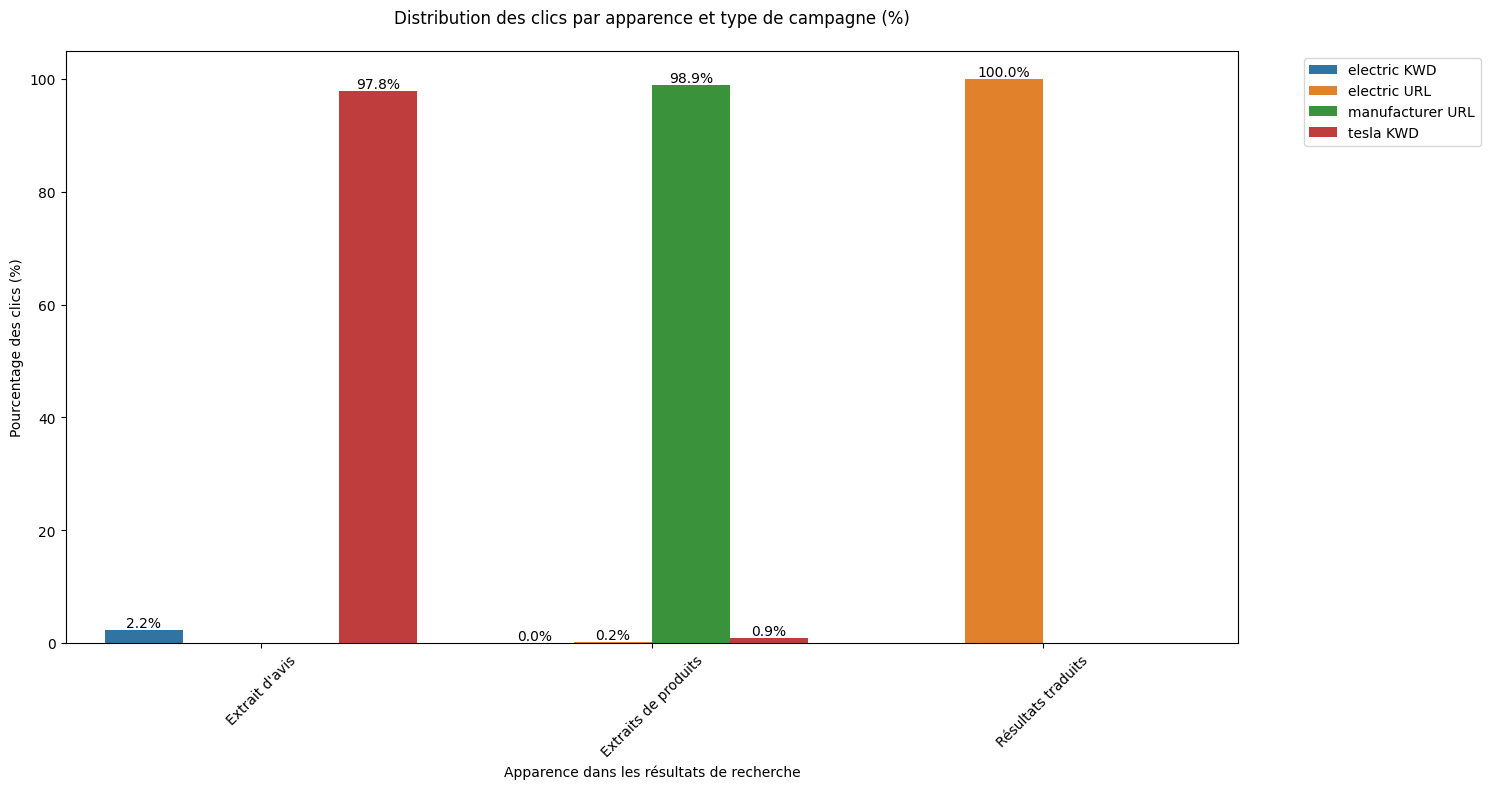


=== KPIs Globaux ===
Total Clics: 221574
Total Impressions: 7153949.0
CTR Moyen: 3.10%
Position Moyenne: 23.58


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier
df = pd.read_excel('clean_data/apparence_final.xlsx')

# Nettoyage des données
def clean_data(df):
    # Convertir les pourcentages en nombres décimaux
    df['CTR'] = df['CTR'].str.rstrip('%').astype('float') / 100
    
    # Convertir les impressions en nombres (enlever les virgules)
    df['Impressions'] = df['Impressions'].astype(str).str.replace(',', '').astype(float)
    
    return df

df = clean_data(df)

# 1. Analyses globales par type d'apparence
def generate_appearance_stats(df):
    return df.groupby(['Apparence dans les résultats de recherche', 'type']).agg({
        'Clics': 'sum',
        'Impressions': 'sum',
        'CTR': lambda x: f"{(x.mean() * 100):.2f}%",
        'Position': 'mean'
    }).round(2)

# 2. Visualisation des clics par apparence (nombres absolus)
def plot_appearance_clicks(df):
    plt.figure(figsize=(15, 8))
    specific_campaigns = ['electric URL', 'tesla KWD', 'electric KWD', 'manufacturer URL']
    df_plot = df[df['type'].isin(specific_campaigns)]
    
    sns.barplot(data=df_plot, x='Apparence dans les résultats de recherche', y='Clics', hue='type')
    plt.title('Distribution des clics par apparence et type de campagne', pad=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt

# 3. Visualisation des clics par apparence (pourcentages)
def plot_appearance_clicks_percentage(df):
    plt.figure(figsize=(15, 8))
    specific_campaigns = ['electric URL', 'tesla KWD', 'electric KWD', 'manufacturer URL']
    df_plot = df[df['type'].isin(specific_campaigns)]
    
    # Calculer le total des clics par apparence
    total_par_apparence = df_plot.groupby('Apparence dans les résultats de recherche')['Clics'].sum()
    
    # Calculer les pourcentages par apparence
    df_percentage = df_plot.groupby(['Apparence dans les résultats de recherche', 'type'])['Clics'].sum().unstack()
    df_percentage = df_percentage.div(total_par_apparence, axis=0) * 100
    df_percentage = df_percentage.reset_index().melt(
        id_vars='Apparence dans les résultats de recherche', 
        var_name='type', 
        value_name='Pourcentage'
    )
    
    # Créer le graphique avec les pourcentages
    sns.barplot(
        data=df_percentage, 
        x='Apparence dans les résultats de recherche', 
        y='Pourcentage', 
        hue='type'
    )
    plt.title('Distribution des clics par apparence et type de campagne (%)', pad=20)
    plt.ylabel('Pourcentage des clics (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    
    # Ajouter les valeurs en pourcentage sur les barres
    for container in plt.gca().containers:
        plt.bar_label(container, fmt='%.1f%%')
    
    plt.tight_layout()
    return plt

# Exécution et affichage
try:
    print("=== Statistiques par apparence ===")
    print(generate_appearance_stats(df))
    
    # Visualisations
    # Premier plot: nombres absolus
    plot_appearance_clicks(df)
    plt.show()
    
    # Deuxième plot: pourcentages
    plot_appearance_clicks_percentage(df)
    plt.show()
    
    # KPIs globaux
    kpis = {
        'Total Clics': df['Clics'].sum(),
        'Total Impressions': df['Impressions'].sum(),
        'CTR Moyen': f"{(df['Clics'].sum() / df['Impressions'].sum() * 100):.2f}%",
        'Position Moyenne': df['Position'].mean().round(2)
    }
    
    print("\n=== KPIs Globaux ===")
    for kpi, value in kpis.items():
        print(f"{kpi}: {value}")

except Exception as e:
    print(f"Une erreur s'est produite: {str(e)}")
    print("Détails de l'erreur:")
    import traceback
    traceback.print_exc()